In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

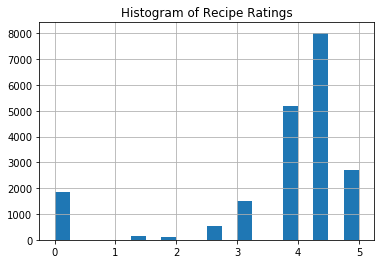

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

/Users/katrinajohnson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Around 5-7 mins. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

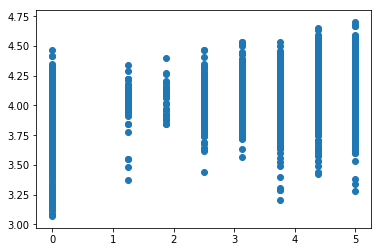

In [8]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [9]:
svr.score(X, Y)

-0.003978314483867873

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

/Users/katrinajohnson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/katrinajohnson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/katrinajohnson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/katrinajohnson/anacon

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.

# Unit 3.4.4 Challenge Begins

### The following is my work.

In [11]:
raw_data

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
raw_data['rating'].max()

5.0

In [13]:

    
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#raw_data['#cakeweek']

cakey = 0
for item in '#cakeweek':
    if item != 0.0:
        cakey = cakey + 1
        
print(cakey)

In [15]:
raw_data['rating'].value_counts()

4.375    8019
3.750    5169
5.000    2719
0.000    1836
3.125    1489
2.500     532
1.250     164
1.875     124
Name: rating, dtype: int64

# How do I create a script that iterates over the columns in the dataframe and drops the comumns that contain fewer than 50 enteries?


cols = list(raw_data.columns)[0:]
raw_data_dict = {}

for col in cols:
    item_count = 0
    if col != 1 :
        item_count = len(col)
        if item_count > 10:
            print('\n', col, item_count)
            
            print([col])
            
        

In [17]:
raw_data.corr()

corr_matrix_df = raw_data.corr()

corr_matrix_df

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
rating,1.000000,0.007882,0.013980,0.007236,0.008177,0.003147,0.006771,0.011155,-0.047840,0.006717,...,-0.003016,-0.023807,0.006771,0.007179,0.002294,-0.009179,-0.051770,-0.037606,-0.006739,0.022599
calories,0.007882,1.000000,0.742816,0.996538,0.996392,-0.000208,-0.000135,-0.000470,-0.000582,-0.000306,...,-0.000597,-0.002484,-0.000134,-0.000290,-0.001970,-0.000180,-0.000283,-0.000616,-0.000484,-0.002255
protein,0.013980,0.742816,1.000000,0.712194,0.749287,-0.000323,-0.000201,-0.000464,-0.000756,-0.000257,...,-0.000858,-0.003113,-0.000197,-0.000354,-0.002561,-0.000231,-0.000289,-0.000882,-0.000701,-0.000742
fat,0.007236,0.996538,0.712194,1.000000,0.986476,-0.000215,-0.000132,-0.000454,-0.000559,-0.000289,...,-0.000578,-0.002387,-0.000132,-0.000289,-0.001894,-0.000174,-0.000277,-0.000594,-0.000464,-0.002215
sodium,0.008177,0.996392,0.749287,0.986476,1.000000,-0.000273,-0.000143,-0.000444,-0.000594,-0.000307,...,-0.000619,-0.002606,-0.000137,-0.000301,-0.002023,-0.000172,-0.000286,-0.000635,-0.000506,-0.001856
#cakeweek,0.003147,-0.000208,-0.000323,-0.000215,-0.000273,1.000000,-0.000122,-0.000504,-0.000635,-0.000323,...,-0.000611,-0.002845,-0.000122,-0.000299,-0.002125,-0.000212,-0.000323,-0.000647,-0.000533,-0.002639
#wasteless,0.006771,-0.000135,-0.000201,-0.000132,-0.000143,-0.000122,1.000000,-0.000206,-0.000259,-0.000132,...,-0.000250,-0.001161,-0.000050,-0.000122,-0.000867,-0.000086,-0.000132,-0.000264,-0.000217,-0.001077
22-minute meals,0.011155,-0.000470,-0.000464,-0.000454,-0.000444,-0.000504,-0.000206,1.000000,-0.001070,0.091180,...,-0.001029,0.005911,-0.000206,-0.000504,0.010584,-0.000356,0.091180,-0.001089,-0.000897,0.007050
3-ingredient recipes,-0.047840,-0.000582,-0.000756,-0.000559,-0.000594,-0.000635,-0.000259,-0.001070,1.000000,-0.000686,...,-0.001297,0.002455,-0.000259,-0.000635,-0.004510,-0.000449,-0.000686,0.035047,-0.001131,0.003521
30 days of groceries,0.006717,-0.000306,-0.000257,-0.000289,-0.000307,-0.000323,-0.000132,0.091180,-0.000686,1.000000,...,-0.000660,-0.003073,-0.000132,-0.000323,-0.002295,-0.000229,-0.000349,-0.000699,-0.000576,-0.002851


In [18]:
raw_data

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
features_selected = corr_matrix_df['rating'].sort_values(ascending=False).head(31).drop('rating') #I need to arrange this in descending order.  See list sort docmentation.

feature_titles = list(features_selected.index)

feature_titles


['bon appétit',
 'peanut free',
 'soy free',
 'tree nut free',
 'bake',
 'roast',
 'fall',
 'sauté',
 'dinner',
 'kosher',
 'winter',
 'pescatarian',
 'thanksgiving',
 'onion',
 'grill/barbecue',
 'high fiber',
 'gourmet',
 'no sugar added',
 'tomato',
 'quick & easy',
 'herb',
 'pork',
 'beef',
 'cheese',
 'low carb',
 'mixer',
 'christmas',
 'sugar conscious',
 'braise',
 'low cal']

In [27]:
#use the features returned in the features_selected variable

x_all = raw_data.loc[:, feature_titles]

x_all

,bon appétit,peanut free,soy free,tree nut free,bake,roast,fall,sauté,dinner,kosher,...,herb,pork,beef,cheese,low carb,mixer,christmas,sugar conscious,braise,low cal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#Note: This for loop works, but is not for use with this challenge
#for feature in corr_matrix_df['rating']:
    #if feature >= .005:
        #high_ratings.append(feature)
    #if feature <= .0049:
        #low_ratings.append(feature)
        
#use a loc statement
high_rating = corr_matrix_df.loc[(corr_matrix_df['rating'] >= 0.03) & (corr_matrix_df['rating'] < 1.0), 'rating']
      
high_rating


low_rating = corr_matrix_df.loc[(corr_matrix_df['rating'] < 0.04) & (corr_matrix_df['rating'] < 1.0), 'rating']

low_rating



In [ ]:
# Example: Code for np.where()

#numpy.where(condition[, x, y])
# The condition will be a boolean statement such as: == , >, <, .isna, .isalpha, .isdiget

In [29]:
y_all = np.where(raw_data['rating'] >= 3.5, 1, 0)



In [31]:
#between 20% and 30% are te normal test set sizes

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.25)

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15039, 30)
(15039,)
(5013, 30)
(5013,)


high_ratings 
y_train_binary = []

for item in high_ratings:
    if item == 1.0:
        high_ratings.drop(item)

y_train_binary = high_ratings, low_ratings
print(y_train_binary)


## Feature Selection: 
1. Select raw_data['rating'] as the outcome feature.  
2. Make raw_data['rating'] binary (i.e. True or False)
3. Make a correlation matrix. The correlation matrix is a data frame.  One column is a series.
4. The rating column of the correlation matrix will be a series, containing the relationship between 'rating' and 
all of the other features.
5. Use the rating column from step 4. to find the correlation coefficients between the recipe ratings 'ratings' and the features in the dataframe.  
Do this by making a histogram of the 'rating' column in step 4. column.
Next, I can choose the features that have the highest correlation with the desired outcome (i.e. the highest
correlation cofficient in relation to the 'rating' column.

## Model Declaration, Model Fitting, and Gathering Explanatory Data:
6. Declaer Support Vector Classifier model. Fit the Support Vector Classifier with x_train, and y_train. Use the predict method on the fitted model to get y_pred.  Use y_pred with other methods to get other metrics. Use the score method. 


In [ ]:
for item in raw_data['rating']:
    if item >= 3.5
    